Accuracy: 0.9278
Confusion Matrix:
[[165  14]
 [ 12 169]]


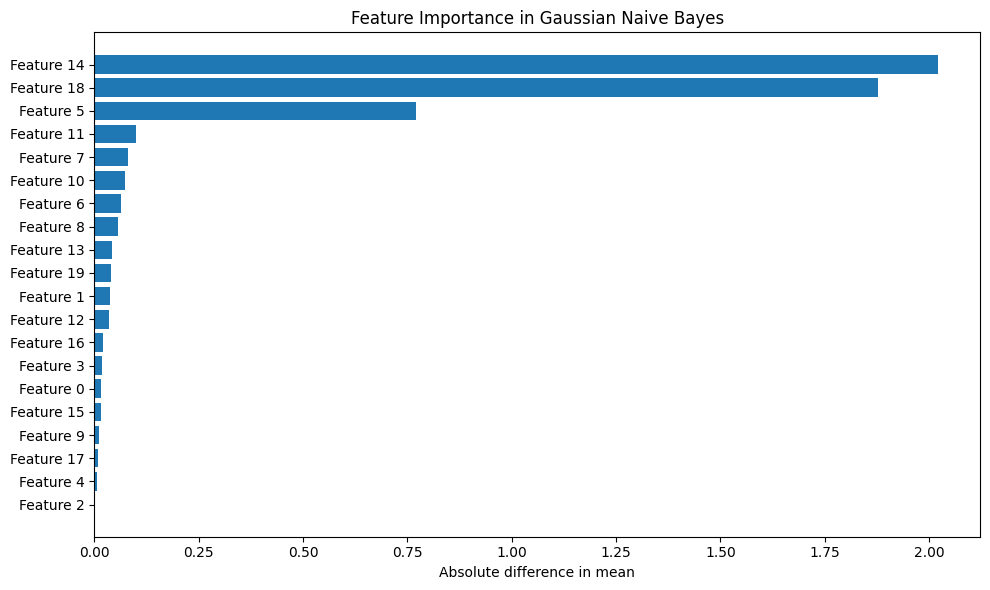

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1800, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importance
# Note: GaussianNB doesn't have a direct feature importance attribute,
# so we'll use the difference in means of features between classes as a proxy.
feature_importance = np.abs(model.theta_[1] - model.theta_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Absolute difference in mean')
plt.title('Feature Importance in Gaussian Naive Bayes')
plt.tight_layout()
plt.show()